# **Amelia Lusiana**

**Mini Project Investigate Hotel Business using Data Visualization**

# Part 1
1. Upload dataset
2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)
3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")
4. Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

## 1. Upload dataset

In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sort_dataframeby_monthorweek as sd
import io
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=a2c662bf8af4828d9bf073b18a2577e00392bdbcc906c564146737778b8e8b9f
  Stored in directory: /root/.cache/pip/wheels/f8/84/15/465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=7c8ee3eca137d6cca42f2d8e31978165d4c9b4d134bd38d5e7ed4833aa0000db
  Stored in directory: /root/.cache/pip/wheels/9a/0d/2e/309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [ ]:
#1. upload data
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['hotel_bookings_data.csv']))

Saving hotel_bookings_data.csv to hotel_bookings_data.csv


In [ ]:
df.shape

(119390, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## 2. Mengatasi Data Null

In [ ]:
#cek null data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
#cek presentase data null
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_weekdays_nights           0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
city                               0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31
days_in_waiting_list               0.00
customer_type                      0.00


***Missing value in columns children(4, float64), city(488, object), agent(16340, float64) and company(112593, float64)***

In [ ]:
#handling data null kolom children dengan mode(data terbanyak)
df[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
40600,City Hotel,1,2,2017,October,32,3,1,0,2,...,0,No Deposit,NaN,NaN,0,Family,12.0,0,1,Canceled
40667,City Hotel,1,1,2017,October,32,5,0,2,2,...,0,No Deposit,14.0,NaN,0,Family,12.0,0,1,Canceled
40679,City Hotel,1,1,2017,October,32,5,0,2,3,...,0,No Deposit,NaN,NaN,0,Family,18.0,0,2,Canceled
41160,City Hotel,1,8,2017,October,33,13,2,5,2,...,0,No Deposit,9.0,NaN,0,Family,76.5,0,1,Canceled


In [ ]:
#mengisi data null dengan mode
df['children'].fillna(value = df['children'].mode()[0], inplace = True)

In [ ]:
#handling data null kolom city dengan hapus data
df[df['city'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30,Resort Hotel,0,118,2017,September,27,1,4,10,1,...,2,No Deposit,NaN,NaN,0,Personal,62.0,0,2,Check-Out
4127,Resort Hotel,1,0,2018,April,8,15,0,0,0,...,0,No Deposit,NaN,383.0,0,Personal,0.0,0,0,Canceled
7092,Resort Hotel,1,8,2018,September,30,21,0,1,1,...,0,No Deposit,NaN,204.0,0,Personal,73.0,0,2,Canceled
7860,Resort Hotel,1,39,2018,October,36,30,0,5,2,...,0,No Deposit,NaN,NaN,0,Personal,159.0,0,5,Canceled
8779,Resort Hotel,1,0,2018,December,42,13,0,1,1,...,0,No Deposit,NaN,457.0,0,Personal,50.0,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2019,June,15,10,0,0,0,...,0,No Deposit,NaN,279.0,0,Personal,0.0,0,0,Canceled
65909,City Hotel,1,0,2019,June,15,10,0,0,0,...,0,No Deposit,NaN,279.0,0,Personal,0.0,0,0,Canceled
65910,City Hotel,1,0,2019,June,15,10,0,0,0,...,0,No Deposit,NaN,279.0,0,Personal,0.0,0,0,Canceled
80830,City Hotel,0,4,2017,January,48,23,1,2,1,...,0,No Deposit,37.0,NaN,0,Family,70.0,0,0,Check-Out


In [ ]:
#menghapus data yang kolom city nya kosong
df.dropna(subset=["city"],inplace=True)

In [ ]:
#handling data null kolom agent dengan merubah data jadi agent dan no agent
df[df['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,No Deposit,NaN,NaN,0,Personal,107.00,0,0,Check-Out
18,Resort Hotel,0,0,2017,September,27,1,0,1,2,...,0,No Deposit,NaN,110.0,0,Personal,107.42,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2019,October,35,29,0,1,1,...,0,No Deposit,NaN,72.0,0,Personal,0.00,0,2,Check-Out
119151,City Hotel,0,0,2019,October,35,29,0,1,2,...,0,No Deposit,NaN,NaN,0,Personal,270.00,0,0,Check-Out
119166,City Hotel,0,0,2019,October,35,30,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,140.00,0,0,Check-Out
119215,City Hotel,0,2,2019,October,35,31,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,140.00,0,2,Check-Out


In [ ]:
# pertama mengganti agent id menjadi hanya 'agent'saja
df.loc[df.agent.isnull()==False,'agent']='agent'

In [ ]:
# mengisi kolom yang kosong dengan 'no agent'
df.agent.fillna('no agent',inplace=True)

In [ ]:
#handling data null kolom company dengan hapus kolom company karena mayoritas data kosong sebesar 94%
df[df['company'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,no agent,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,no agent,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,no agent,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,agent,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,agent,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,agent,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,agent,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,agent,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,agent,NaN,0,Personal,104.40,0,0,Check-Out


In [ ]:
#menghapus kolom company
df=df.drop(['company'],axis=1)

In [ ]:
#cek kembali data null
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

##3. Mengganti Value Tidak Sesuai

In [ ]:
cat = df.select_dtypes(include='object')
catcol = cat.columns
num = df.select_dtypes(include=['int64', 'float64'])
numcol = num.columns

In [ ]:
for col in catcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom hotel:
City Hotel      79306
Resort Hotel    39596
Name: hotel, dtype: int64

Value counts kolom arrival_date_month:
October      13856
September    12628
July         11779
December     11095
June         11045
August       10927
November     10467
May           9739
April         8012
January       6752
February      6728
March         5874
Name: arrival_date_month, dtype: int64

Value counts kolom meal:
Breakfast     91867
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64

Value counts kolom city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

Value counts kolom

***Undefined value in columns meal(1169), market_segment(2) and distribution_channel(5)***

In [ ]:
#Handling 'undefined' value column meal with 'no meal'
df['meal'].replace(to_replace = 'Undefined', value = 'No Meal', inplace = True)

In [ ]:
#Handling 'undefined' value column market_segment with mode(data terbanyak)
df['market_segment'].replace(to_replace = 'Undefined', value = 'Online TA', inplace = True)

In [ ]:
#Handling 'undefined' value column distribution_channel with mode(data terbanyak)
df['distribution_channel'].replace(to_replace = 'Undefined', value = 'TA/TO', inplace = True)

##4. Membuang Data yang Tidak Diperlukan

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2018.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Diasumsikan minimum reservasi hotel untuk 1 orang dewasa, karena tidak mungkin ada anak yang memesan hotel tanpa orang dewasa. Jadi akan menghapus data dalam kolom adults yang adults nya 0.
len(df[df['adults'] == 0])

393

In [ ]:
df.drop(df[df['adults'] == 0].index, inplace = True)

In [ ]:
#cek data duplicated
df.duplicated().sum()

33233

In [ ]:
#remove duplicated data, keep the first row
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85276 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85276 non-null  object 
 1   is_canceled                     85276 non-null  int64  
 2   lead_time                       85276 non-null  int64  
 3   arrival_date_year               85276 non-null  int64  
 4   arrival_date_month              85276 non-null  object 
 5   arrival_date_week_number        85276 non-null  int64  
 6   arrival_date_day_of_month       85276 non-null  int64  
 7   stays_in_weekend_nights         85276 non-null  int64  
 8   stays_in_weekdays_nights        85276 non-null  int64  
 9   adults                          85276 non-null  int64  
 10  children                        85276 non-null  float64
 11  babies                          85276 non-null  int64  
 12  meal                           

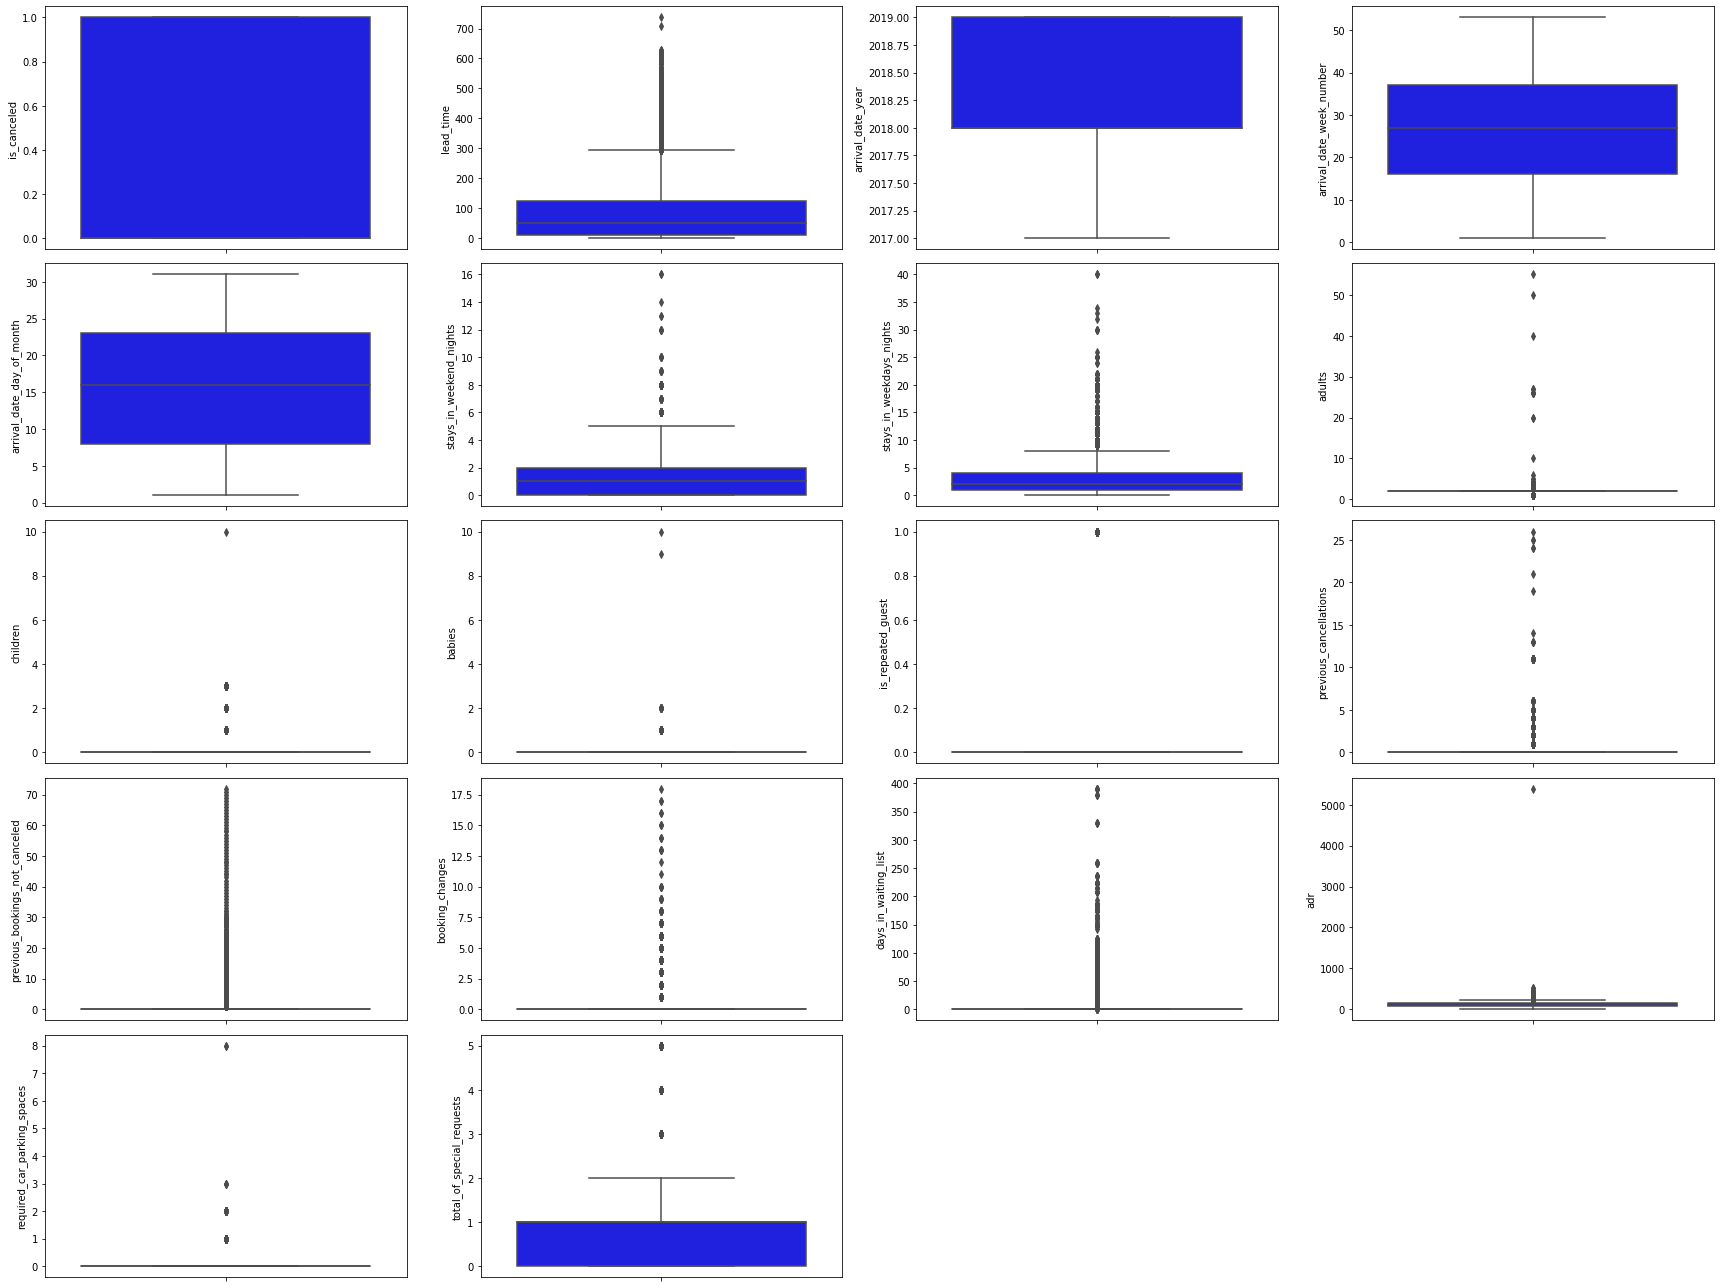

In [ ]:
#cek outliers
plt.figure(figsize=(24,18))
for i in range(0, len(numcol)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[numcol[i]], color='blue', orient='n')
    plt.tight_layout()

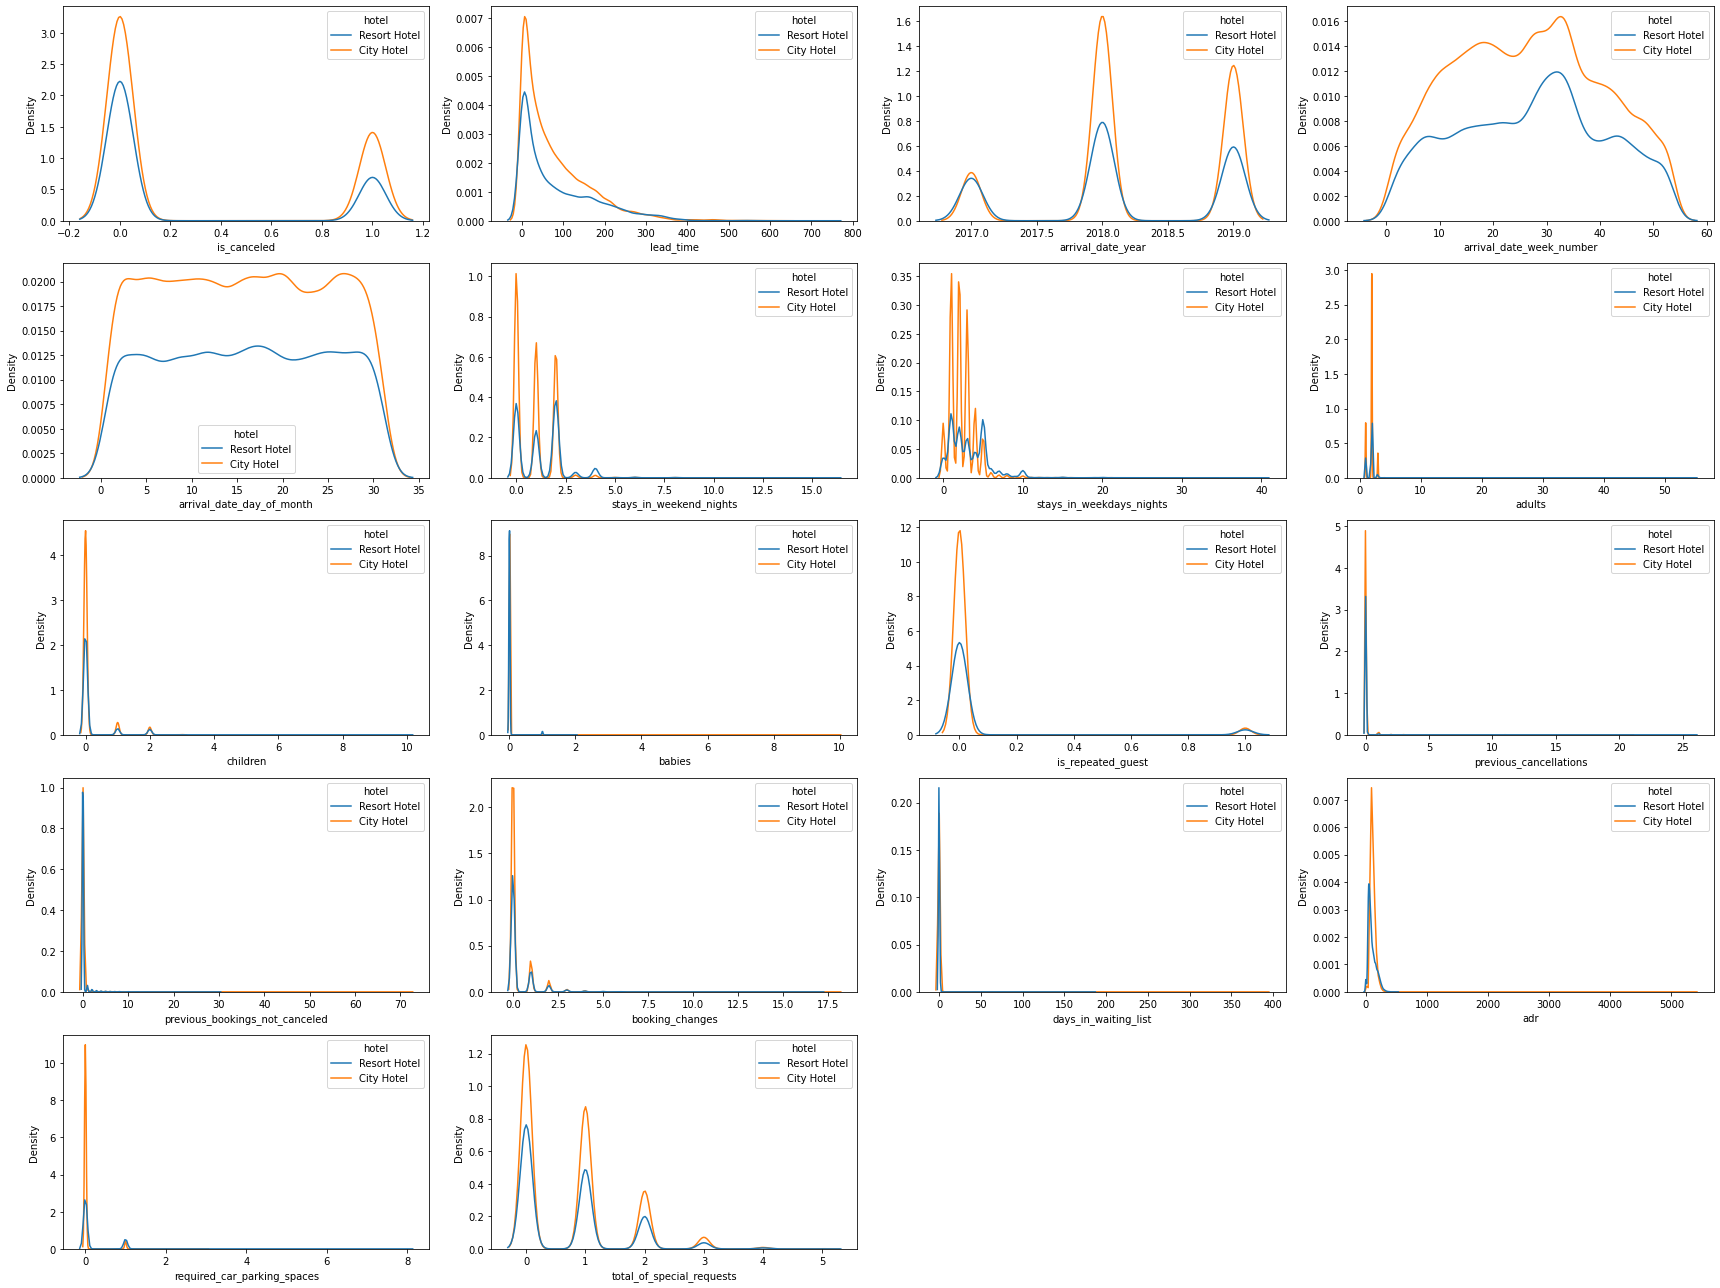

In [ ]:
plt.figure(figsize=(24,18))
for i in range(0, len(numcol)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df[numcol[i]], color='red', hue=df['hotel'])
    plt.tight_layout()

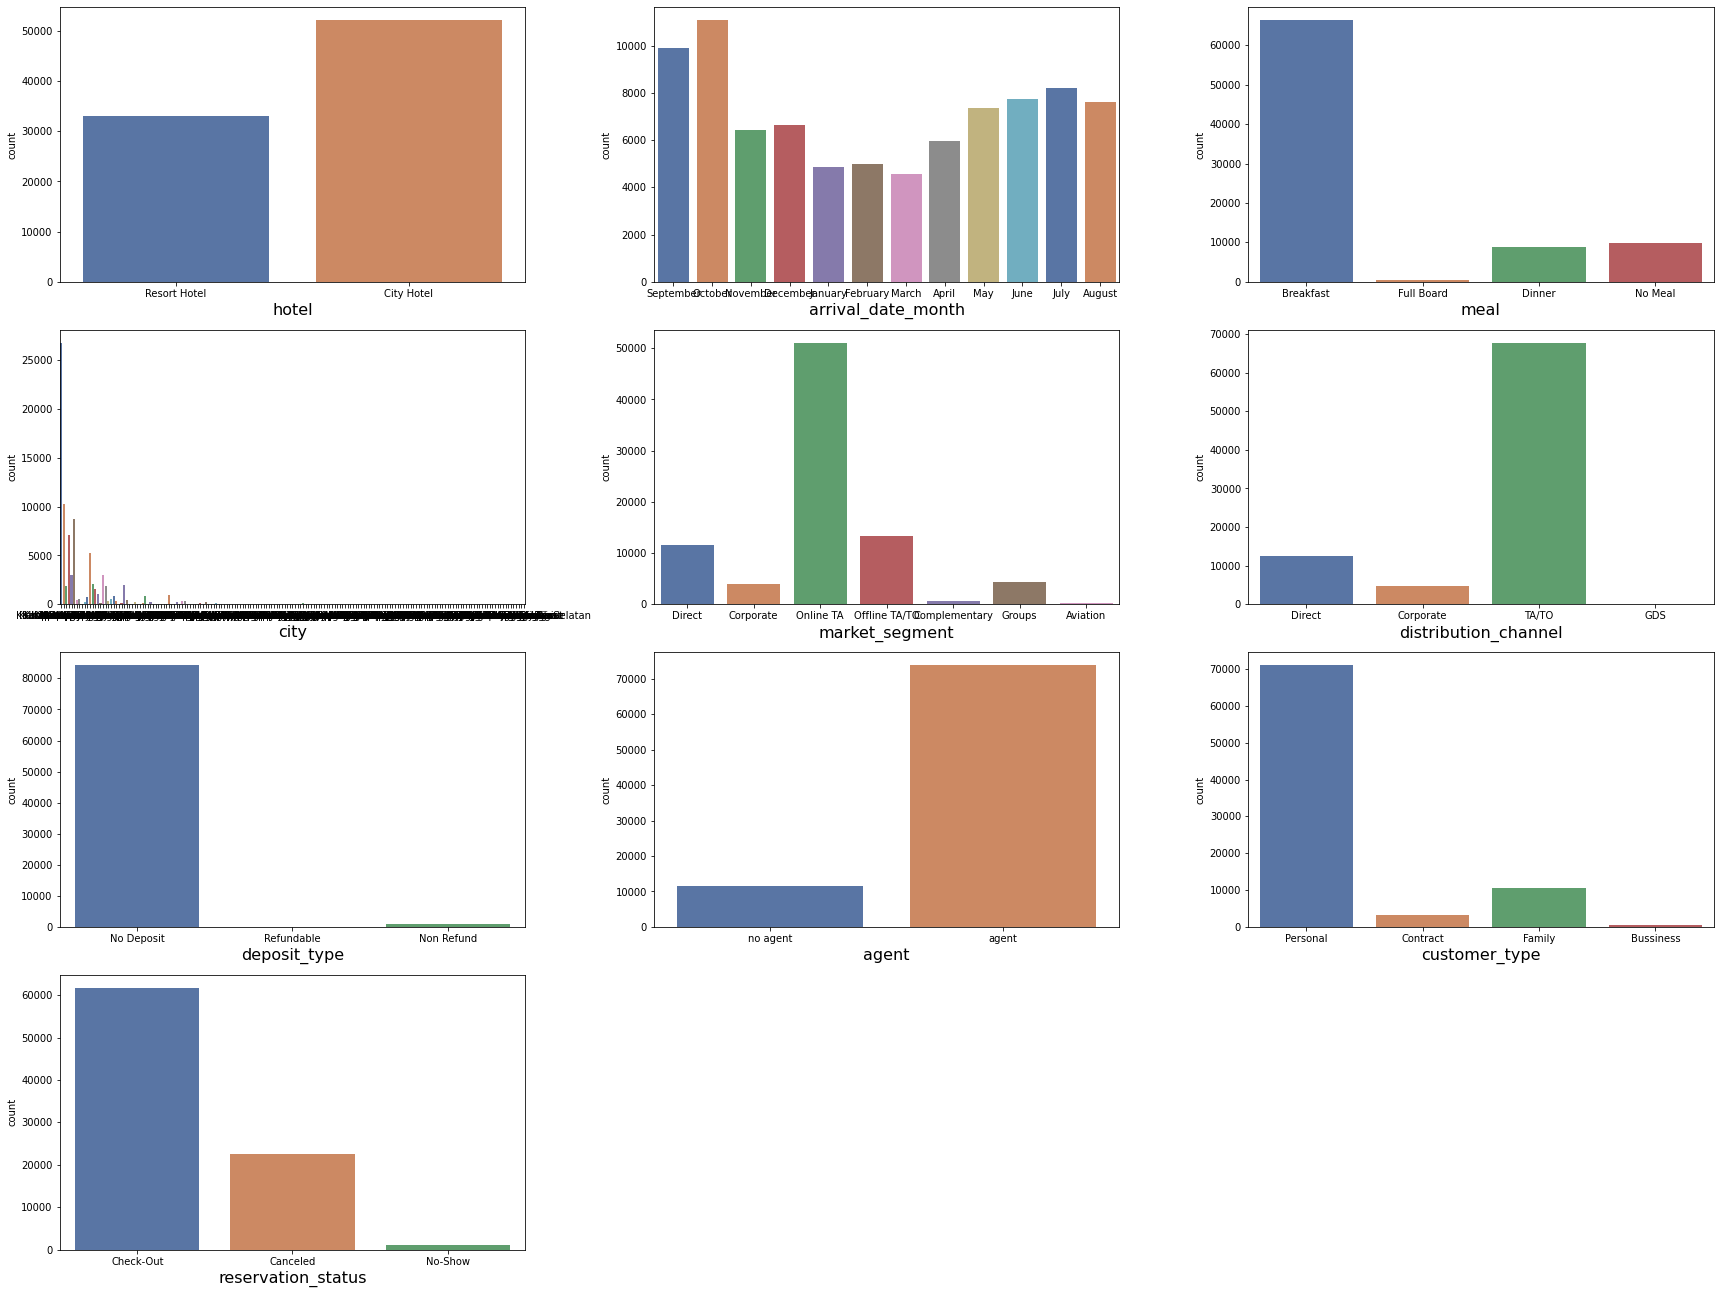

In [ ]:
plt.figure(figsize = (24,18))
for i in range(0, len(catcol)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[catcol[i]], palette='deep', orient='h')
    plt.tight_layout()
    plt.xlabel(xlabel=catcol[i],fontsize=16)

In [ ]:
df1 = df.copy()

# Part 2
1. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel 
setiap bulannya berdasarkan jenis hotel (Petunjuk:Perhatikan data tahun kedatangan).
2. Lakukan normalisasi data (Petunjuk:Perhatikan data bulan September dan Oktober).
3. Urutkan data berdasarkan bulan (Petunjuk: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)
4. Buatlah plot yang dapat mengarahkan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint:Perhatikan jenis plot yang digunakan)
5. Interpretasi terhadap hasil plot pada langkah sebelumnya (Petunjuk:Perhatikan hari libur di Indonesia)

## 1. Tabel perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [ ]:
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['hotel'].count().to_frame().reset_index()

In [ ]:
city_hotel = data_city.groupby(['arrival_date_month'])['hotel'].count().to_frame().reset_index()

In [ ]:
month_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
month_hotel.columns = ['month', 'resort_hotel', 'city_hotel']
month_hotel

,month,resort_hotel,city_hotel
0,April,1987,2576
1,August,1893,3406
2,December,2104,2933
3,February,1658,1984
4,January,1686,2135
5,July,2201,3600
6,June,2097,3283
7,March,1611,1923
8,May,2101,3436
9,November,1803,3014


In [ ]:
plt.figure(figsize = (24, 10))
px.histogram(month_hotel, x = 'month', y = ['resort_hotel','city_hotel'],
        title = 'Perubahan Jumlah Pemesanan Hotel')

<Figure size 1728x720 with 0 Axes>

In [ ]:
#rubah data type int menjadi str
df1['arrival_date_year'] = df1['arrival_date_year'].astype('str')
df1['arrival_date_month'] = df1['arrival_date_month'].astype('str')

In [ ]:
#buat kolom baru berisi arrival month dan year
df1['arrival_date_my'] = df1['arrival_date_month'] + '-' + df1['arrival_date_year']

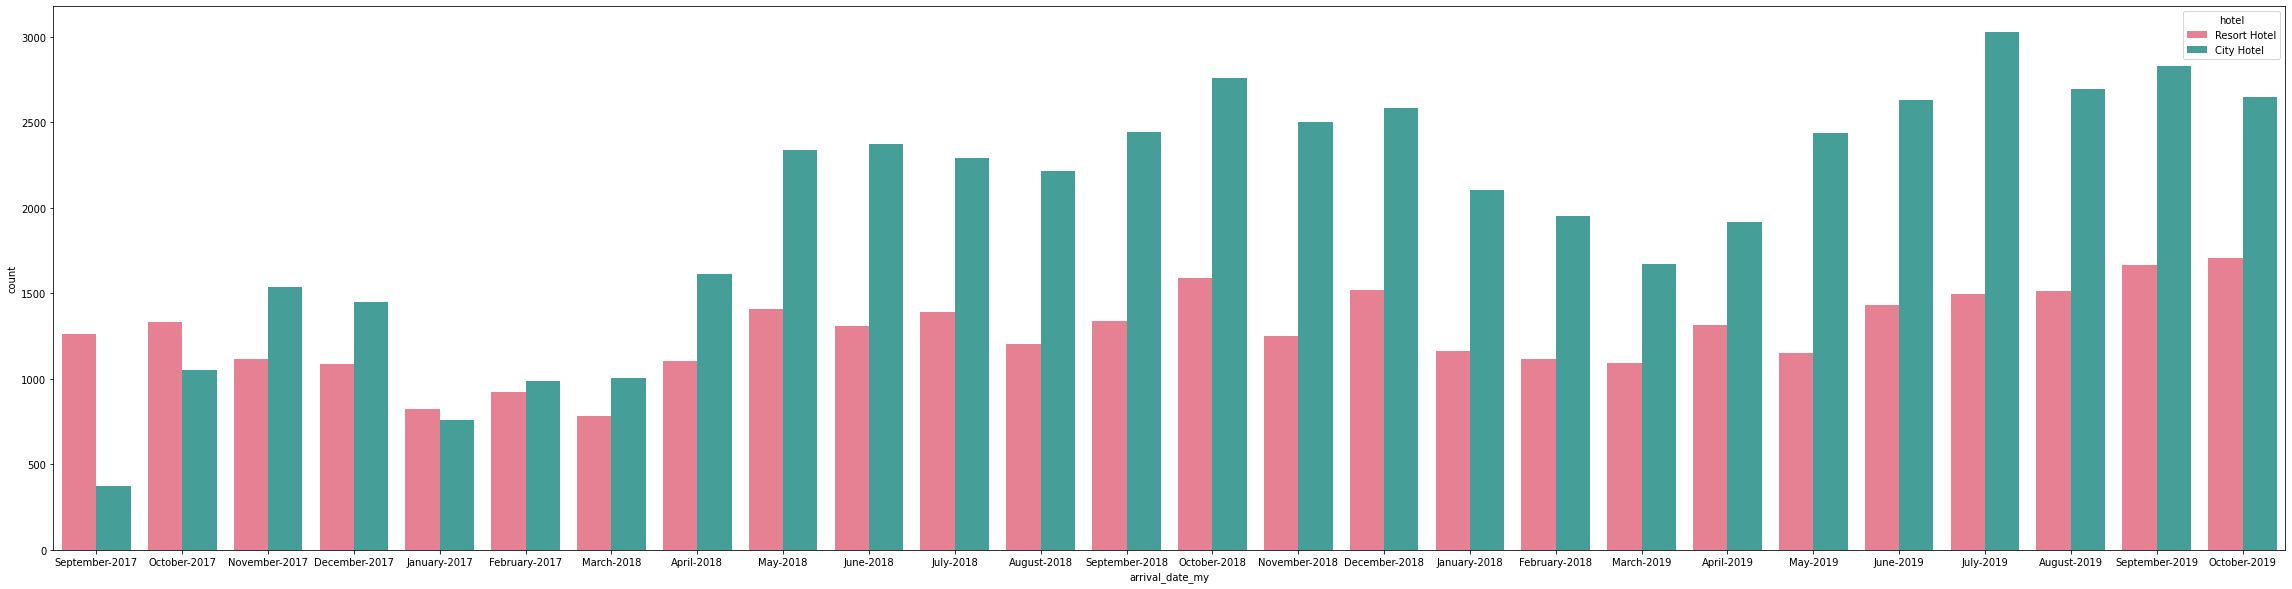

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(data = df1, x = 'arrival_date_my', hue='hotel', palette='husl')
plt.show()

***Data bulan september dan oktober lebih besar karena terhitung 3 tahun (2017, 2018 dan 2019). Sedangkan bulan november, desember, januari, februari, maret, april, mei, juni, juli, agustus hanya 2 tahun (2017 dan 2018 / 2018 dan 2019). Jadi untuk mengambil data genap 2 periode (2 tahun), data hanya akan diambil data terbaru dari bulan november 2017 - oktober 2019.***

## 2. Lakukan normalisasi data.

In [ ]:
#hapus data bulan september 2017
df1.drop(df1[df1['arrival_date_my'] == 'September-2017'].index, inplace = True)

In [ ]:
#hapus data bulan oktober 2017
df1.drop(df1[df1['arrival_date_my'] == 'October-2017'].index, inplace = True)

In [ ]:
data_resort_new = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city_new = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

In [ ]:
resort_hotel_new = data_resort_new.groupby(['arrival_date_month'])['hotel'].count().to_frame().reset_index()

In [ ]:
city_hotel_new = data_city_new.groupby(['arrival_date_month'])['hotel'].count().to_frame().reset_index()

In [ ]:
month_hotel_new = resort_hotel_new.merge(city_hotel_new, on = 'arrival_date_month')
month_hotel_new.columns = ['month', 'resort_hotel', 'city_hotel']
month_hotel_new

,month,resort_hotel,city_hotel
0,April,1987,2576
1,August,1893,3406
2,December,2104,2933
3,February,1658,1984
4,January,1686,2135
5,July,2201,3600
6,June,2097,3283
7,March,1611,1923
8,May,2101,3436
9,November,1803,3014


In [ ]:
plt.figure(figsize = (24, 10))
px.histogram(month_hotel_new, x = 'month', y = ['resort_hotel','city_hotel'],
        title = 'Perubahan Jumlah Pemesanan Hotel')

<Figure size 1728x720 with 0 Axes>

## 3. Urutkan data berdasarkan bulan

In [ ]:
def sort_month(df1, column_name):
    return sd.Sort_Dataframeby_Month(df1, column_name)

In [ ]:
month_order = sort_month(month_hotel_new,'month')
month_order

,month,resort_hotel,city_hotel
0,January,1686,2135
1,February,1658,1984
2,March,1611,1923
3,April,1987,2576
4,May,2101,3436
5,June,2097,3283
6,July,2201,3600
7,August,1893,3406
8,September,1993,3621
9,October,2131,3547


## 4. Buatlah plot yang dapat mengarahkan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel.

In [ ]:
plt.figure(figsize = (20, 10))
px.line(month_order, x = 'month', y = ['resort_hotel','city_hotel'],
        title = 'Perubahan Jumlah Pemesanan Hotel', template = 'plotly_dark')

<Figure size 1440x720 with 0 Axes>

## 5. Interpretasi terhadap hasil plot pada langkah sebelumnya

* Data diambil 24 bulan dari bulan November 2017 - October 2019.
* Dapat dilihat dari hasil pengelompokan perbulan bahwa pemesanan city hotel lebih besar dibanding resort hotel, dikarenakan harga city hotel lebih murah daripada resort hotel, dan secara lokasi city hotel di tengah kota lebih dekat jika ingin pergi kemana-mana.
* Terjadi peningkatan dibulan April hingga Juni, dikarenakan adanya tanggal merah dibulan april dan mei, lalu libur cuti bersama lebaran dibulan juni.
* Ada penurunan dibulan oktober karena tidak ada tanggal merah atau hari libur nasional.

# Part 3
1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)
2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)



## 1. Buatlah kolom baru yang berisi total durasi menginap

In [105]:
#intialisasi copy data
df2 = df1.copy()

In [106]:
#buat kolom baru total durasi menginap
df2['total_nights'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date_my,total_nights
1485,Resort Hotel,1,38,2017,November,36,1,0,2,2,...,No Deposit,agent,0,Personal,123.00,0,0,Canceled,November-2017,2
1486,Resort Hotel,1,47,2017,November,36,1,0,2,2,...,No Deposit,agent,0,Personal,98.00,0,1,Canceled,November-2017,2
1487,Resort Hotel,0,48,2017,November,36,1,0,3,2,...,No Deposit,agent,0,Personal,151.00,0,0,Check-Out,November-2017,3
1488,Resort Hotel,0,48,2017,November,36,1,0,3,2,...,No Deposit,agent,0,Personal,134.67,0,1,Check-Out,November-2017,3
1489,Resort Hotel,0,27,2017,November,36,1,0,3,2,...,No Deposit,agent,0,Personal,153.00,0,2,Check-Out,November-2017,3


## 2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan

In [107]:
#rubah data type total night ke integer
df2['total_nights'] = df2['total_nights'].astype('int')

In [108]:
#buat kolom baru pengelompokan durasi menginap
duration_group = []
for x in df2['total_nights']:
    if x <=3 :
        duration_group.append('0-3 days')
    elif x <=7 :
        duration_group.append('4-7 days')
    elif x <=14 :
        duration_group.append('8-14 days')
    elif x <=21 :
        duration_group.append('15-21 days')
    else:
        duration_group.append('more than 3 weeks')

df2['duration_group'] = duration_group

In [111]:
#tabel pemesanan hotel berdasarkan kelompok durasi menginap 
df_duration = df2.groupby('duration_group')['hotel'].count()
df_duration = df_duration.sort_values(ascending=False)
df_duration

duration_group
0-3 days             48088
4-7 days             28827
8-14 days             4005
15-21 days             218
more than 3 weeks      123
Name: hotel, dtype: int64

## 3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel.


In [134]:
data_resort_cancel = df2[(df2['hotel'] == 'Resort Hotel') & (df2['is_canceled'] == 1)]
data_city_cancel = df2[(df2['hotel'] == 'City Hotel') & (df2['is_canceled'] == 1)]

In [135]:
resort_hotel_cancel = data_resort_cancel.groupby(['duration_group'])['hotel'].count().to_frame().reset_index()

In [136]:
city_hotel_cancel = data_city_cancel.groupby(['duration_group'])['hotel'].count().to_frame().reset_index()

In [137]:
resort_hotel_new = data_resort_new.groupby(['arrival_date_month'])['hotel'].count().to_frame().reset_index()
duration_hotel = resort_hotel_cancel.merge(city_hotel_cancel, on = 'duration_group')
duration_hotel.columns = ['duration_group', 'resort_hotel', 'city_hotel']
duration_hotel

,duration_group,resort_hotel,city_hotel
0,0-3 days,2748,9269
1,15-21 days,44,68
2,4-7 days,3569,5433
3,8-14 days,842,500
4,more than 3 weeks,26,39


## 4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel.

In [138]:
#buat kolom baru grup durasi menginap untuk setiap hotel
df2['stay_hotel'] = df2['duration_group'] + [' on '] + df2['hotel']

In [139]:
data_cancel = df2[(df2['is_canceled'] == 1)]
data_stay = df2[(df2['is_canceled'] == 0)]

In [140]:
group_cancel = data_cancel.groupby(['stay_hotel'])['is_canceled'].count().to_frame().reset_index()

In [141]:
group_stay = data_stay.groupby(['stay_hotel'])['is_canceled'].count().to_frame().reset_index()

In [142]:
stay_cancel = group_cancel.merge(group_stay, on = 'stay_hotel')
stay_cancel.columns = ['orders', 'cancel', 'stay']
stay_cancel

,orders,cancel,stay
0,0-3 days on City Hotel,9269,23797
1,0-3 days on Resort Hotel,2748,12274
2,15-21 days on City Hotel,68,25
3,15-21 days on Resort Hotel,44,81
4,4-7 days on City Hotel,5433,11174
5,4-7 days on Resort Hotel,3569,8651
6,8-14 days on City Hotel,500,456
7,8-14 days on Resort Hotel,842,2207
8,more than 3 weeks on City Hotel,39,6
9,more than 3 weeks on Resort Hotel,26,52


In [143]:
plt.figure(figsize = (24, 12))
px.histogram(stay_cancel, y = 'orders', x = ['stay','cancel'],
        title = 'Rasio Pembatalan Pesanan Terhadap Durasi Menginap Untuk Setiap Tipe Hotel')

<Figure size 1728x864 with 0 Axes>

## 5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya

* Dari bulan November 2017 sampai dengan October 2019 total pesanan yang paling banyak dicancel yaitu **City Hotel** sebesar **18,84%** dari keseluruhan pemesanan (81.261 orders) atau **30,15%** dari keseluruhan pemesanan City Hotel (15.309 orders) dengan durasi menginap selama **1-3 Hari**.
* Selain itu, **peringkat kedua dan ketiga** pesanan hotel yang di cancel berada pada kelompok durasi menginap selama 4-7 hari yaitu **City Hotel** dan **Resort Hotel**
* Ada kemungkinan pembatalan pemesanan terjadi segera setelah pemesanan. Dan ada banyak alasan untuk hal ini termasuk kebijakan pembatalan hotel yang ini berlaku untuk kedua jenis hotel atau Bisa adanya kesalahan pemesanan oleh customer.


# Part 4
1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)
2. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)
3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)
4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

## 1. Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan 

In [120]:
#initialisasi copy df
df3 = df2.copy()

In [126]:
df3['lead_time'].describe()

count    81261.000000
mean        80.123823
std         86.138390
min          0.000000
25%         12.000000
50%         49.000000
75%        126.000000
max        709.000000
Name: lead_time, dtype: float64

In [129]:
#buat kolom baru pengelompokan jarak waktu pemesanan
leadtime_group = []
for x in df3['lead_time']:
    if x <=7 :
        leadtime_group.append('0-7 days')
    elif x <=30 :
        leadtime_group.append('8-30 days')
    elif x <=90 :
        leadtime_group.append('31-90 days')
    elif x <=180 :
        leadtime_group.append('91-180 days')
    else:
        leadtime_group.append('more than 6 months')

df3['leadtime_group'] = leadtime_group

In [130]:
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date_my,total_nights,duration_group,stay_hotel,leadtime_group
1485,Resort Hotel,1,38,2017,November,36,1,0,2,2,...,Personal,123.00,0,0,Canceled,November-2017,2,0-3 days,0-3 days on Resort Hotel,31-90 days
1486,Resort Hotel,1,47,2017,November,36,1,0,2,2,...,Personal,98.00,0,1,Canceled,November-2017,2,0-3 days,0-3 days on Resort Hotel,31-90 days
1487,Resort Hotel,0,48,2017,November,36,1,0,3,2,...,Personal,151.00,0,0,Check-Out,November-2017,3,0-3 days,0-3 days on Resort Hotel,31-90 days
1488,Resort Hotel,0,48,2017,November,36,1,0,3,2,...,Personal,134.67,0,1,Check-Out,November-2017,3,0-3 days,0-3 days on Resort Hotel,31-90 days
1489,Resort Hotel,0,27,2017,November,36,1,0,3,2,...,Personal,153.00,0,2,Check-Out,November-2017,3,0-3 days,0-3 days on Resort Hotel,8-30 days


In [133]:
#tabel pemesanan hotel berdasarkan kelompok jarak waktu pemesanan
df_leadtime = df3.groupby('leadtime_group')['hotel'].count()
df_leadtime = df_leadtime.sort_values(ascending=False)
df_leadtime

leadtime_group
31-90 days            20935
91-180 days           17030
0-7 days              16809
8-30 days             15476
more than 6 months    11011
Name: hotel, dtype: int64

## 2.  Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel

In [148]:
data_cancel_resort = df3[(df3['hotel'] == 'Resort Hotel') & (df3['is_canceled'] == 1)]
data_cancel_city = df3[(df3['hotel'] == 'City Hotel') & (df3['is_canceled'] == 1)]

In [149]:
data_leadtime_resort = data_cancel_resort.groupby(['leadtime_group'])['hotel'].count().to_frame().reset_index()

In [150]:
data_leadtime_city = data_cancel_city.groupby(['leadtime_group'])['hotel'].count().to_frame().reset_index()

In [151]:
leadtime_hotel = data_leadtime_resort.merge(data_leadtime_city, on = 'leadtime_group')
leadtime_hotel.columns = ['leadtime_group', 'resort_hotel', 'city_hotel']
leadtime_hotel

,leadtime_group,resort_hotel,city_hotel
0,0-7 days,459,955
1,31-90 days,1920,4876
2,8-30 days,1111,2851
3,91-180 days,1962,3993
4,more than 6 months,1777,2634


##3. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel

In [156]:
#buat kolom baru grup jarak waktu pemesanan untuk setiap hotel
df3['leadtime_hotel'] = df3['leadtime_group'] + [' on '] + df3['hotel']

In [157]:
data_cancel = df3[(df3['is_canceled'] == 1)]
data_stay = df3[(df3['is_canceled'] == 0)]

In [158]:
group_cancel = data_cancel.groupby(['leadtime_hotel'])['is_canceled'].count().to_frame().reset_index()

In [159]:
group_stay = data_stay.groupby(['leadtime_hotel'])['is_canceled'].count().to_frame().reset_index()

In [160]:
leadtime_cancel = group_cancel.merge(group_stay, on = 'leadtime_hotel')
leadtime_cancel.columns = ['orders', 'cancel', 'stay']
leadtime_cancel

,orders,cancel,stay
0,0-7 days on City Hotel,955,8140
1,0-7 days on Resort Hotel,459,7255
2,31-90 days on City Hotel,4876,9767
3,31-90 days on Resort Hotel,1920,4372
4,8-30 days on City Hotel,2851,7313
5,8-30 days on Resort Hotel,1111,4201
6,91-180 days on City Hotel,3993,7024
7,91-180 days on Resort Hotel,1962,4051
8,more than 6 months on City Hotel,2634,3214
9,more than 6 months on Resort Hotel,1777,3386


In [161]:
plt.figure(figsize = (24, 12))
px.histogram(leadtime_cancel, y = 'orders', x = ['stay','cancel'],
        title = 'Rasio Pembatalan Pesanan Terhadap Jarak Waktu Pemesanan Untuk Setiap Tipe Hotel')

<Figure size 1728x864 with 0 Axes>

## 4. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

* Dari keseluruhan pemesanan **(81.261 order) **yang melakukan pembatalan pemesanan yaitu **15.309 order** sebesar **18,84%**.
* Pemesanan yang paling banyak dicancel yaitu pemesanan **City Hotel** dengan jarak waktu **31-90 hari **sebelum tanggal check-in sebesar **31,85% (4.876 order)**.
* Selain itu, **peringkat kedua dan ketiga** pemesanan hotel yang di cancel juga berada pada tipe **City Hotel** dengan jarak waktu **91-180 hari** dan **8-30 hari** sebelum tanggal check-in.
* Pembatalan pemesanan **Resort Hotel** juga cukup besar, setengah daripada pembatalan pemesanan City Hotel yaitu **7229 order**.
* Karena kemungkinan pembatalan pemesanan terjadi segera setelah pemesanan itu tidak terbukti, ada baiknya pihak hotel meninjau kembali opsi free refund atau free cancellation pemesanan City Hotel. 
* Opsi free refund atau free cancellation policy bisa dibatasi jarak waktu pemesanannya, atau bisa juga dibatasi hanya harga kamar-kamar tertentu.